# Linear Regression Practical Implementation

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [5]:
df=fetch_california_housing()

In [6]:
dataset = pd.DataFrame(df.data)

In [7]:
dataset.columns=df.feature_names

In [8]:
## Independent feature and dependent features
X=dataset
y=df.target

In [9]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
## train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
## standerdizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [12]:
scaler.fit_transform(X_train) # X_train ka data normalize ho gaya hai!

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [13]:
# Abb iss normalized data set ko X_train mein daal do
X_train = scaler.fit_transform(X_train)

In [14]:
X_test= scaler.transform(X_test) #search karo ki idhar fit kyu nahi kiya...

In [15]:
from sklearn.linear_model import LinearRegression

##Cross Validation-

from sklearn.model_selection import cross_val_score

In [16]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [17]:
mse=cross_val_score(regression , X_train , y_train, scoring = 'neg_mean_squared_error' , cv = 10)

In [18]:
np.mean(mse) #finding mean of all possible outputs of the crossvalidated data

-0.5257104326777

In [19]:
## prediction
reg_pred=regression.predict(X_test)

In [20]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

C:\Users\Arnav Mehta\AppData\Local\Temp\ipykernel_26816\838020795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_pred - y_test)


<Axes: ylabel='Density'>

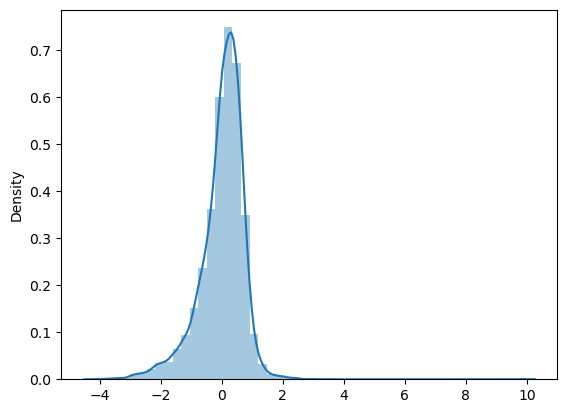

In [21]:
import seaborn as sns
sns.distplot(reg_pred - y_test)

## Observation:
1.Overall variance is quite less
2.There are some outliers too

In [22]:
from sklearn.metrics import r2_score

In [23]:
score=r2_score(reg_pred,y_test)

In [24]:
score

0.34513393809439596

# Ridge Regression Algorithm

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
ridge_regressor = Ridge()


In [27]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [28]:
print(ridgecv.best_params_)

{'alpha': 5}


In [29]:
print(ridgecv.best_score_)

-0.5268179966861515


In [30]:
ridge_pred=ridgecv.predict(X_test)

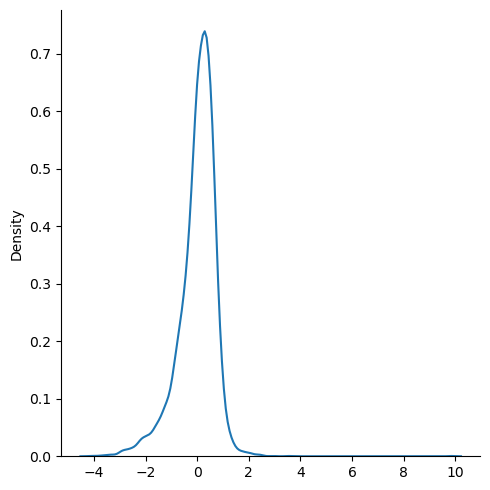

In [32]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [33]:
score=r2_score(ridge_pred,y_test)

In [34]:
score

0.34383945441404473

# Lasso regression

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [45]:
lasso = Lasso()


In [46]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Sample data (replace this with your actual data)
X = np.random.rand(100, 10)  # Example feature matrix
y = np.random.rand(100)       # Example target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso regressor
lasso = Lasso()

# Define the parameter grid
parameters = {'alpha': [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]}

# Initialize GridSearchCV
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the model
lassocv.fit(X_train, y_train)

# Get the best parameters and the best score
best_alpha = lassocv.best_params_['alpha']
best_score = -lassocv.best_score_  # Convert to positive MSE

print(f'Best alpha: {best_alpha}')
print(f'Best cross-validated MSE: {best_score}')

# Optionally, evaluate on the test set
y_pred = lassocv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {test_mse}')


Best alpha: 2
Best cross-validated MSE: 0.088095769631753
Test MSE: 0.07913954122584962


In [47]:
lasso_pred=lassocv.predict(X_test)

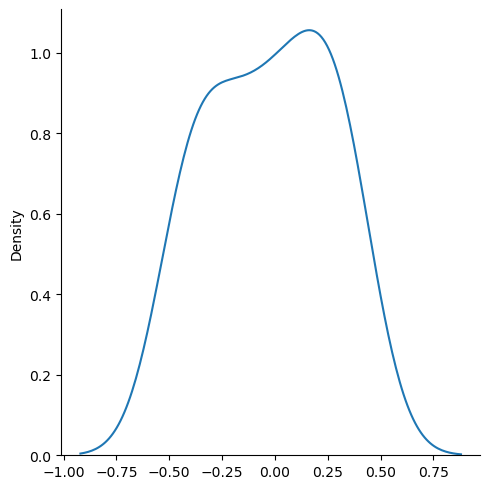

In [48]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

Best parameters: {'alpha': 90}
Best cross-validated MSE: 0.08743248570502374
Test MSE: 0.10031349760047345


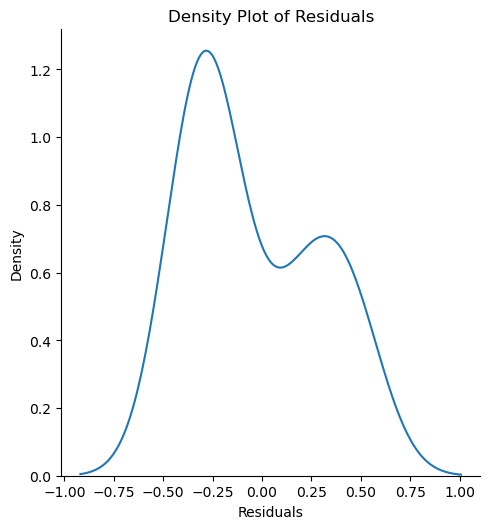

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Sample data (replace this with your actual data)
X = np.random.rand(100, 10)  # Example feature matrix
y = np.random.rand(100)       # Example target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge regressor
ridge_regressor = Ridge()

# Define the parameter grid
parameters = {'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]}

# Initialize GridSearchCV
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the model
ridgecv.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", ridgecv.best_params_)
print("Best cross-validated MSE:", -ridgecv.best_score_)  # Convert to positive MSE

# Make predictions
ridge_pred = ridgecv.predict(X_test)

# Calculate and print test MSE
test_mse = mean_squared_error(y_test, ridge_pred)
print("Test MSE:", test_mse)

# Plot residuals
sns.displot(ridge_pred - y_test, kind='kde')
plt.title("Density Plot of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()
